In [15]:
import numpy as np
import pandas as pd
df = pd.read_csv('gene_expression.csv')
df

,Gene_1,Gene_2,Gene_3,Gene_4,Gene_5,Gene_6,Gene_7,Gene_8,Gene_9,Gene_10,...,Gene_12,Gene_13,Gene_14,Gene_15,Gene_16,Gene_17,Gene_18,Gene_19,Gene_20,Label
0,11.490142,9.585207,11.943066,14.569090,9.297540,8.622411,14.593120,11.509884,8.283615,9.734065,...,13.443734,9.069345,1.198976,-0.600506,4.186085,21.706979,17.166140,0.520556,-0.849201,Normal
1,14.396946,9.322671,10.202585,5.725755,8.366852,10.546061,6.548225,10.310005,8.857330,10.062489,...,18.293159,12.703928,5.552088,11.840363,7.976867,11.056056,-6.975512,4.866444,6.333552,Normal
2,12.215400,10.514105,9.653055,9.096689,5.564434,6.232908,7.855359,12.402224,10.090952,5.540354,...,23.771048,9.806642,10.267380,17.702006,15.207280,9.582820,12.106616,21.276508,7.272193,Normal
3,8.562477,9.443023,6.680995,6.411380,12.437577,13.874894,9.519455,11.006736,11.720326,6.825382,...,9.982204,12.670085,10.100498,0.053931,10.990258,15.140225,13.695250,4.046695,4.311964,Normal
4,9.340984,11.071338,14.433682,8.445189,7.574519,8.554661,13.023583,12.346912,7.101899,8.520290,...,6.613410,6.808755,7.474600,20.957258,7.774254,4.000273,7.959296,15.122257,19.738452,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,16.090863,12.998542,17.519374,15.108927,13.678094,12.064713,5.056505,8.072958,5.079619,11.121748,...,10.418224,11.275880,8.699495,-10.050417,18.636839,13.080497,6.255954,9.589664,2.725457,Cancer
96,8.062101,16.243731,10.781771,14.717741,20.222248,6.635985,4.128515,11.134503,12.536222,15.325485,...,20.976541,9.387537,14.799808,18.809464,-1.192538,8.702102,12.062719,10.984620,9.200683,Cancer
97,14.924152,12.825054,14.807381,12.970423,15.864716,9.750757,10.744171,9.866800,13.403539,7.926146,...,13.381372,7.544096,2.735676,4.627935,7.700393,8.482055,8.885011,18.936122,17.601464,Cancer
98,13.835318,14.856662,15.563367,15.935647,15.666813,10.254904,8.718257,9.053057,10.858907,12.144803,...,-11.836851,10.161150,10.263288,4.890883,6.258353,21.023314,16.167215,3.058546,3.233161,Cancer


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [17]:
X = df.iloc[:,:-1]
y = pd.get_dummies(df['Label']).reindex(columns = ['Cancer','Normal'], fill_value=0)['Cancer']
y

0     0
1     0
2     0
3     0
4     0
     ..
95    1
96    1
97    1
98    1
99    1
Name: Cancer, Length: 100, dtype: uint8

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [19]:
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, classification_report
estimator = LogisticRegression(random_state = 42, max_iter = 1000)
rfe = RFE(estimator, n_features_to_select=5, step = 1)

rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(max_iter=1000, random_state=42),
    n_features_to_select=5)

In [20]:
selected_features = X_train.columns[rfe.support_]
print(f"Selected genes: {list(selected_features)}")

Selected genes: ['Gene_1', 'Gene_2', 'Gene_3', 'Gene_5', 'Gene_7']


In [21]:
feature_ranking = rfe.ranking_
print(f"Feature Ranking: {dict(zip(X_train.columns, feature_ranking))}")

Feature Ranking: {'Gene_1': 1, 'Gene_2': 1, 'Gene_3': 1, 'Gene_4': 4, 'Gene_5': 1, 'Gene_6': 2, 'Gene_7': 1, 'Gene_8': 15, 'Gene_9': 3, 'Gene_10': 6, 'Gene_11': 8, 'Gene_12': 10, 'Gene_13': 14, 'Gene_14': 16, 'Gene_15': 7, 'Gene_16': 12, 'Gene_17': 5, 'Gene_18': 13, 'Gene_19': 9, 'Gene_20': 11}


In [27]:
X_train_selected = rfe.transform(X_train)
X_test_selected = rfe.transform(X_test)

final_model = LogisticRegression(random_state=42, max_iter=1000)
final_model.fit(X_train_selected, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [28]:
#prediction
y_pred = final_model.predict(X_test_selected)

In [29]:
#model evaluation
accuracy = accuracy_score(y_test, y_pred)
classficationReport = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Classification report:\n{classficationReport}")

Accuracy: 0.8
Classification report:
              precision    recall  f1-score   support

           0       0.88      0.70      0.78        10
           1       0.75      0.90      0.82        10

    accuracy                           0.80        20
   macro avg       0.81      0.80      0.80        20
weighted avg       0.81      0.80      0.80        20



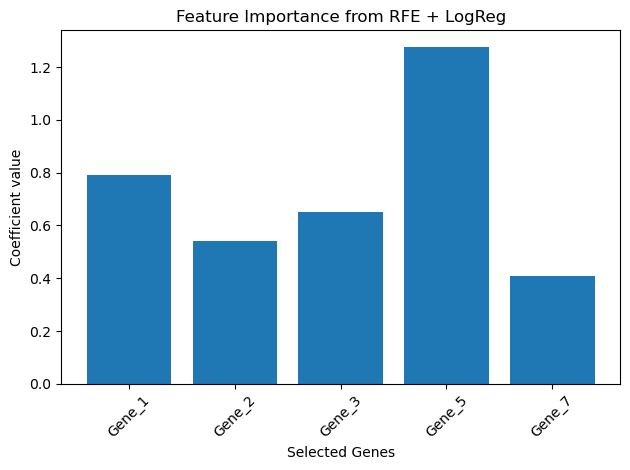

In [31]:
#visualisation
import matplotlib.pyplot as plt
importances = final_model.coef_[0]
plt.bar(range(len(selected_features)), importances)
plt.xticks(range(len(selected_features)), selected_features, rotation = 45)
plt.xlabel('Selected Genes')
plt.ylabel('Coefficient value')
plt.title('Feature Importance from RFE + LogReg')
plt.tight_layout()
plt.show()